In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,No,date,age,distance 1,distance 2,X1,X2,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          414 non-null    int64  
 1   date        414 non-null    float64
 2   age         414 non-null    float64
 3   distance 1  414 non-null    float64
 4   distance 2  414 non-null    int64  
 5   X1          414 non-null    float64
 6   X2          414 non-null    float64
 7   price       414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
housing.describe()

,No,date,age,distance 1,distance 2,X1,X2,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'distance 1'}>,
        <Axes: title={'center': 'distance 2'}>,
        <Axes: title={'center': 'X1'}>],
       [<Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

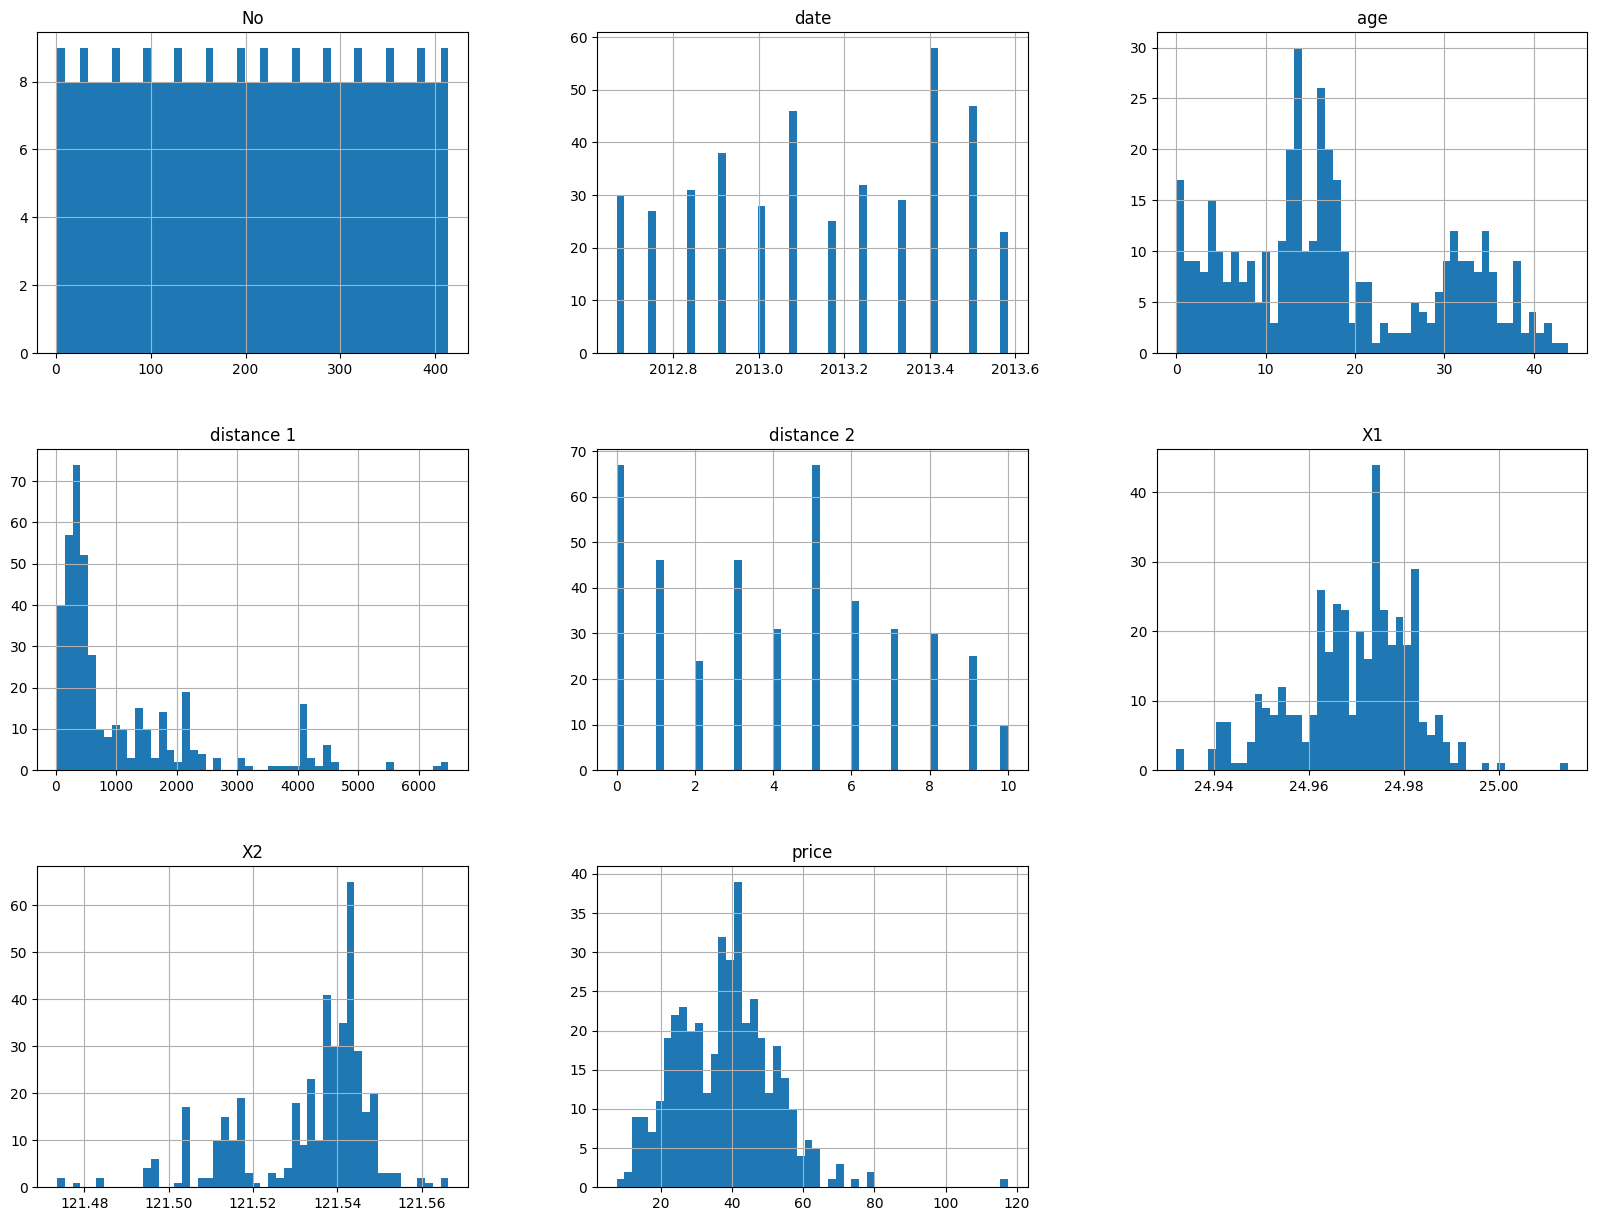

In [8]:
housing.hist(bins=50 , figsize=(20 , 15))

In [9]:
import numpy as np
def train_test(data , testR) :
    np.random.seed(42)
    shuffle = np.random.permutation(len(data))
    testSS = int(len(data)*testR)
    testI = shuffle[:testSS]
    trainI = shuffle[testSS :]
    return data.iloc[trainI] , data.iloc[testI]

In [10]:
#trainSet , testSet = train_test(housing , 0.2)

In [11]:
#print(f"Rows in train set : {len(trainSet)}\nRows in test set : {len(testSet)}")

In [12]:
from sklearn.model_selection import train_test_split
trainSet , testSet = train_test_split(housing , test_size=0.2 , random_state=42)
print(f"Rows in train set : {len(trainSet)}\nRows in test set : {len(testSet)}")

Rows in train set : 331
Rows in test set : 83


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42)
for trainI , testI in split.split(housing , housing['distance 2']) :
    stratTrain = housing.loc[trainI]
    stratTest = housing.loc[testI]

In [14]:
stratTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 119 to 151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          83 non-null     int64  
 1   date        83 non-null     float64
 2   age         83 non-null     float64
 3   distance 1  83 non-null     float64
 4   distance 2  83 non-null     int64  
 5   X1          83 non-null     float64
 6   X2          83 non-null     float64
 7   price       83 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 5.8 KB


In [15]:
corrM = housing.corr()
corrM['age'].sort_values(ascending=False)

age           1.000000
X1            0.054420
distance 2    0.049593
distance 1    0.025622
date          0.017549
No           -0.032808
X2           -0.048520
price        -0.210567
Name: age, dtype: float64

In [16]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='date', ylabel='age'>,
        <Axes: xlabel='price', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='date'>,
        <Axes: xlabel='date', ylabel='date'>,
        <Axes: xlabel='price', ylabel='date'>],
       [<Axes: xlabel='age', ylabel='price'>,
        <Axes: xlabel='date', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>]], dtype=object)

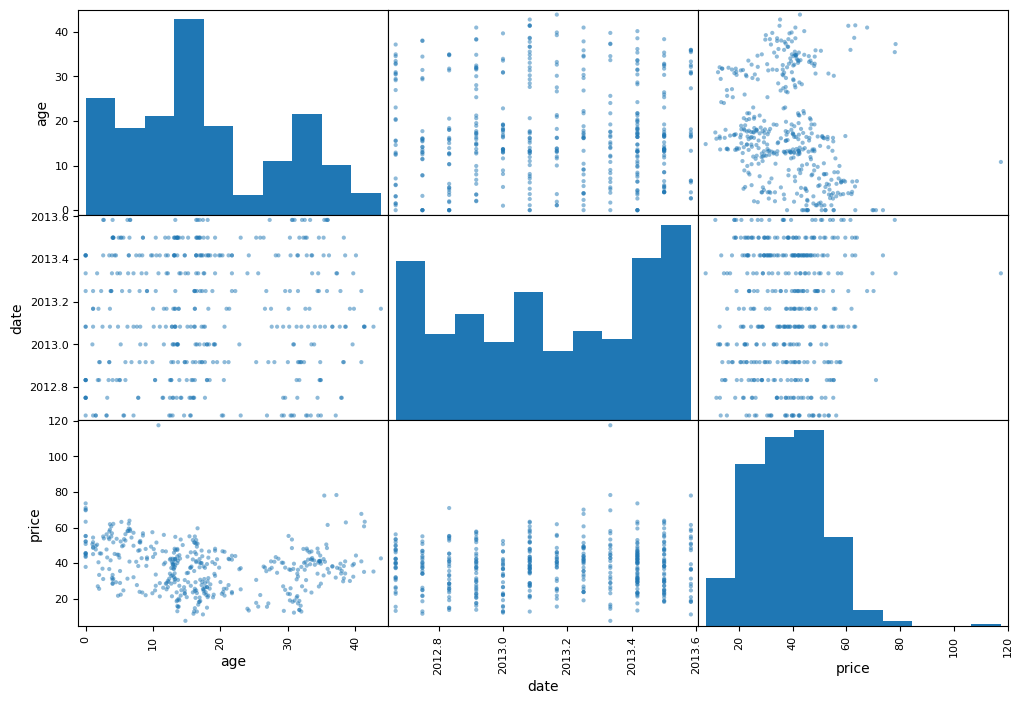

In [17]:
attr = ["age","date","price"]
scatter_matrix(housing[attr], figsize=(12,8))

<Axes: xlabel='price', ylabel='age'>

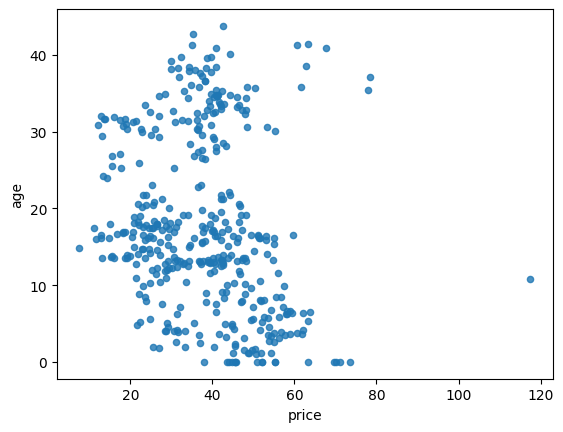

In [18]:
housing.plot(kind="scatter",x="price",y="age",alpha=0.8)

In [19]:
housing = stratTrain.drop("age",axis=1)
Label = stratTrain["age"].copy()

In [20]:
from sklearn.impute import SimpleImputer  # to fill missing values in the dataset
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_.shape

(7,)

In [22]:
x = imputer.transform(housing)
hTr = pd.DataFrame(x , columns=housing.columns)
hTr.describe()

,No,date,distance 1,distance 2,X1,X2,price
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,209.368580,2013.142767,1080.612966,4.102719,24.969250,121.533541,37.623565
std,120.383667,0.280728,1250.250085,2.944182,0.012326,0.015267,12.960756
min,1.000000,2012.667000,23.382840,0.000000,24.933630,121.475160,7.600000
25%,103.500000,2012.917000,289.324800,1.000000,24.963050,121.529675,27.300000
50%,209.000000,2013.167000,492.231300,4.000000,24.971100,121.538440,38.300000
75%,311.500000,2013.417000,1448.504000,6.000000,24.978045,121.543395,46.150000
max,414.000000,2013.583000,6396.283000,10.000000,25.014590,121.566270,78.300000


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
myPipe = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler())
])

In [24]:
housingNum = myPipe.fit_transform(hTr)

In [25]:
housingNum.shape

(331, 7)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housingNum,Label)

LinearRegression()

In [27]:
sData = housing.iloc[:5]
sLabel = Label.iloc[:5]
prData = myPipe.transform(sData)
model.predict(prData)

array([20.09763253, 20.6340464 , 16.90189231, 20.19699601, 19.63550185])

In [28]:
list(sLabel) 

[20.2, 32.9, 26.9, 34.8, 16.4]

In [29]:
from sklearn.metrics import mean_squared_error
housingPr = model.predict(housingNum)
mse = mean_squared_error(Label , housingPr)
r = np.sqrt(mse)
r

10.767022463721993

In [30]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model , housingNum , Label , scoring ="neg_mean_squared_error", cv=10)
r_score = np.sqrt(-score)
r_score

array([10.48495228, 10.16395353,  9.75525498, 11.04541957, 12.8339941 ,
       11.3768855 , 10.30607636, 10.06410293, 10.94286062, 13.86330772])

In [31]:
def pr_score(score) :
    print("SCORES : ",score)
    print("MEAN : ", score.mean())
    print("STANDARD DEVIATION : ", score.std())
pr_score(r_score)

SCORES :  [10.48495228 10.16395353  9.75525498 11.04541957 12.8339941  11.3768855
 10.30607636 10.06410293 10.94286062 13.86330772]
MEAN :  11.083680757962615
STANDARD DEVIATION :  1.2454108822123469


In [32]:
from joblib import dump , load
dump(model,'dragon.joblib')

['dragon.joblib']

In [33]:
x_test = stratTest.drop("age",axis=1)
y_test = stratTest["age"].copy()
xtest_pr = myPipe.transform(x_test)
final_pr = model.predict(xtest_pr)
final_mse = mean_squared_error(y_test , final_pr)
final_rmse = np.sqrt(final_mse)
final_rmse

10.343306254783766

In [34]:
print(final_pr , list(y_test))

[ 13.11144903  19.24444531  15.47691045  15.09382621  12.94917981
   3.57751451  21.31864621  22.17531826  18.99456888 -18.6284796
  16.52679673  14.99486495  10.08512437  20.50400468  12.68589627
  25.54209262  17.80777088  21.72971267  19.97688114  15.58733874
  17.7457998   13.23583901  27.87702051  20.03173408  22.65679047
  21.98914573  13.36378744  18.85258483  11.96034644  17.73398246
  16.41157612  17.89545298  23.11068763  20.29986013  21.69330366
  26.16413174  16.05309637  22.86713392  18.72565239  16.5331252
  15.38587135  13.13217985  15.24742652  21.9598334   17.08394794
  15.04146937  23.83889093  18.19656947  22.83862013  19.18910519
  15.72982206  25.9600533   17.29259519  15.97366788  23.51404713
  17.27026681  11.29718282  14.392615     7.07052156  16.48650681
  16.5438746   18.11112271  18.37747289  14.02818345  20.62117674
  18.77653843  25.07314286   6.50765599  18.74944529  18.19346072
  20.45710116   8.16296177  18.69639023  19.79096187  22.46312056
  21.1667917

In [35]:
prData[0]

array([ 1.33634919, -1.69732575,  0.88477281, -0.37510886, -0.48993566,
       -1.38876478, -1.14545847])